# Example for reading an Eiger image
Use the HDF5 notebook image inorder to be sure that the necessary python modules are installed.  It is also possible to run this with other notebook images that have the correct modules available.

### Import libraries
The hdf5plugin module provides HDF5 compression filters (namely: blosc, bitshuffle and lz4) and registers them to the HDF5 library used by h5py.

#### Bitshuffle
The bitshuffle filter is necessary for reading Eiger images.
The hdf5plugin however is not needed if the bitshuffle python module itself has been installed separately and the HDF5_PLUGIN_PATH environemental variable is set properly.

For example, if using a conda environment installed on the local system, it could be something like:
```bash
HDF5_PLUGIN_PATH=/opt/conda/lib/python3.7/site-packages/bitshuffle/plugin
```

Or, if bitshuffle has been loaded via Lmod, it could look something like:
```bash
HDF5_PLUGIN_PATH=/sw/easybuild/software/bitshuffle/0.3.5-fosscuda-2019b-h5py-2.10.0-Python-3.7.4-HDF5-1.10.5/hdf5plugins
```

In [1]:
%matplotlib inline

import os
HDF5_PLUGIN_PATH = os.environ.get('HDF5_PLUGIN_PATH', '')
if HDF5_PLUGIN_PATH:
    print("HDF5_PLUGIN_PATH is set: ", HDF5_PLUGIN_PATH)
else:
    print("HDF5_PLUGIN_PATH is NOT set, importing hdf5plugin & bitshuffle")
    import hdf5plugin
    import bitshuffle

import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
print('If no errors, then everything was imported.')

HDF5_PLUGIN_PATH is set:  /home/jupyterhub/jupyter-aalto/triton-jupyterhub-dev/miniconda/share/jupyter/conda_envs/maxiv-jhub-hpc-environment-hdf5/lib/python3.7/site-packages/bitshuffle/plugin/
If no errors, then everything was imported.


### Open a data file

In [2]:
f = h5py.File('/mxn/groups/kits/scisw/jupyterhub/data-for-validations/my_data_000001.h5', 'r')

## Choosing a section of a big image
Compare with what is seen in the [HDF5 viewer](https://hdf5view.maxiv.lu.se/html/?data=/data/staff/common/hdf5-example-data/eiger-16M-data/my_data_000001.h5/entry/data/data[3:4,3334:3773,2089:3081])

In [3]:
dataset_name = 'entry/data/data'
image_series = f[dataset_name][3:4,3334:3773,2089:3081]
image = image_series[0]

### Print some elements of the image matrix

In [4]:
someelements = image[0:5,0:5]
print(someelements)

[[0 1 1 0 0]
 [0 1 1 0 2]
 [3 1 0 0 0]
 [2 0 0 1 0]
 [0 1 0 1 0]]


### Plot the image with matplotlib

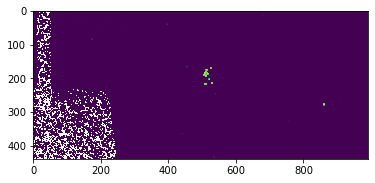

In [5]:
pltimshow = plt.imshow(image, norm=LogNorm())